<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_jhu_csse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !apt-get -qq install python-cartopy python3-cartopy

In [2]:
# import cartopy.crs as ccrs
import json
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np
plt.close('all')
plt.xkcd()

In [0]:
# run all requests for summary
api = request.get('https://covid19.mathdro.id/api')
confirmed = request.get('https://covid19.mathdro.id/api/confirmed')
deaths = request.get('https://covid19.mathdro.id/api/deaths')
us_confirmed = request.get('https://covid19.mathdro.id/api/countries/USA/confirmed')
ph_confirmed = request.get('https://covid19.mathdro.id/api/countries/Philippines/confirmed')

In [4]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-05-30 15:34:42.516846


In [0]:
# state population data from https://datausa.io/api/data?drilldowns=State&measures=Population&year=latest
# included here as string because no reason to make calls on 2 year old data
us_pop = '[{"ID State":"04000US30","State":"Montana","ID Year":2018,"Year":"2018","Population":1062305,"Slug State":"montana"},{"ID State":"04000US01","State":"Alabama","ID Year":2018,"Year":"2018","Population":4887871,"Slug State":"alabama"},{"ID State":"04000US04","State":"Arizona","ID Year":2018,"Year":"2018","Population":7171646,"Slug State":"arizona"},{"ID State":"04000US05","State":"Arkansas","ID Year":2018,"Year":"2018","Population":3013825,"Slug State":"arkansas"},{"ID State":"04000US06","State":"California","ID Year":2018,"Year":"2018","Population":39557045,"Slug State":"california"},{"ID State":"04000US08","State":"Colorado","ID Year":2018,"Year":"2018","Population":5695564,"Slug State":"colorado"},{"ID State":"04000US09","State":"Connecticut","ID Year":2018,"Year":"2018","Population":3572665,"Slug State":"connecticut"},{"ID State":"04000US10","State":"Delaware","ID Year":2018,"Year":"2018","Population":967171,"Slug State":"delaware"},{"ID State":"04000US11","State":"District of Columbia","ID Year":2018,"Year":"2018","Population":702455,"Slug State":"district-of-columbia"},{"ID State":"04000US12","State":"Florida","ID Year":2018,"Year":"2018","Population":21299325,"Slug State":"florida"},{"ID State":"04000US13","State":"Georgia","ID Year":2018,"Year":"2018","Population":10519475,"Slug State":"georgia"},{"ID State":"04000US15","State":"Hawaii","ID Year":2018,"Year":"2018","Population":1420491,"Slug State":"hawaii"},{"ID State":"04000US16","State":"Idaho","ID Year":2018,"Year":"2018","Population":1754208,"Slug State":"idaho"},{"ID State":"04000US17","State":"Illinois","ID Year":2018,"Year":"2018","Population":12741080,"Slug State":"illinois"},{"ID State":"04000US18","State":"Indiana","ID Year":2018,"Year":"2018","Population":6691878,"Slug State":"indiana"},{"ID State":"04000US19","State":"Iowa","ID Year":2018,"Year":"2018","Population":3156145,"Slug State":"iowa"},{"ID State":"04000US20","State":"Kansas","ID Year":2018,"Year":"2018","Population":2911510,"Slug State":"kansas"},{"ID State":"04000US21","State":"Kentucky","ID Year":2018,"Year":"2018","Population":4468402,"Slug State":"kentucky"},{"ID State":"04000US22","State":"Louisiana","ID Year":2018,"Year":"2018","Population":4659978,"Slug State":"louisiana"},{"ID State":"04000US23","State":"Maine","ID Year":2018,"Year":"2018","Population":1338404,"Slug State":"maine"},{"ID State":"04000US24","State":"Maryland","ID Year":2018,"Year":"2018","Population":6042718,"Slug State":"maryland"},{"ID State":"04000US25","State":"Massachusetts","ID Year":2018,"Year":"2018","Population":6902149,"Slug State":"massachusetts"},{"ID State":"04000US26","State":"Michigan","ID Year":2018,"Year":"2018","Population":9995915,"Slug State":"michigan"},{"ID State":"04000US27","State":"Minnesota","ID Year":2018,"Year":"2018","Population":5611179,"Slug State":"minnesota"},{"ID State":"04000US28","State":"Mississippi","ID Year":2018,"Year":"2018","Population":2986530,"Slug State":"mississippi"},{"ID State":"04000US29","State":"Missouri","ID Year":2018,"Year":"2018","Population":6126452,"Slug State":"missouri"},{"ID State":"04000US02","State":"Alaska","ID Year":2018,"Year":"2018","Population":737438,"Slug State":"alaska"},{"ID State":"04000US31","State":"Nebraska","ID Year":2018,"Year":"2018","Population":1929268,"Slug State":"nebraska"},{"ID State":"04000US32","State":"Nevada","ID Year":2018,"Year":"2018","Population":3034392,"Slug State":"nevada"},{"ID State":"04000US33","State":"New Hampshire","ID Year":2018,"Year":"2018","Population":1356458,"Slug State":"new-hampshire"},{"ID State":"04000US34","State":"New Jersey","ID Year":2018,"Year":"2018","Population":8908520,"Slug State":"new-jersey"},{"ID State":"04000US35","State":"New Mexico","ID Year":2018,"Year":"2018","Population":2095428,"Slug State":"new-mexico"},{"ID State":"04000US36","State":"New York","ID Year":2018,"Year":"2018","Population":19542209,"Slug State":"new-york"},{"ID State":"04000US37","State":"North Carolina","ID Year":2018,"Year":"2018","Population":10383620,"Slug State":"north-carolina"},{"ID State":"04000US38","State":"North Dakota","ID Year":2018,"Year":"2018","Population":760077,"Slug State":"north-dakota"},{"ID State":"04000US39","State":"Ohio","ID Year":2018,"Year":"2018","Population":11689442,"Slug State":"ohio"},{"ID State":"04000US40","State":"Oklahoma","ID Year":2018,"Year":"2018","Population":3943079,"Slug State":"oklahoma"},{"ID State":"04000US41","State":"Oregon","ID Year":2018,"Year":"2018","Population":4190713,"Slug State":"oregon"},{"ID State":"04000US42","State":"Pennsylvania","ID Year":2018,"Year":"2018","Population":12807060,"Slug State":"pennsylvania"},{"ID State":"04000US44","State":"Rhode Island","ID Year":2018,"Year":"2018","Population":1057315,"Slug State":"rhode-island"},{"ID State":"04000US45","State":"South Carolina","ID Year":2018,"Year":"2018","Population":5084127,"Slug State":"south-carolina"},{"ID State":"04000US46","State":"South Dakota","ID Year":2018,"Year":"2018","Population":882235,"Slug State":"south-dakota"},{"ID State":"04000US47","State":"Tennessee","ID Year":2018,"Year":"2018","Population":6770010,"Slug State":"tennessee"},{"ID State":"04000US48","State":"Texas","ID Year":2018,"Year":"2018","Population":28701845,"Slug State":"texas"},{"ID State":"04000US49","State":"Utah","ID Year":2018,"Year":"2018","Population":3161105,"Slug State":"utah"},{"ID State":"04000US50","State":"Vermont","ID Year":2018,"Year":"2018","Population":626299,"Slug State":"vermont"},{"ID State":"04000US51","State":"Virginia","ID Year":2018,"Year":"2018","Population":8517685,"Slug State":"virginia"},{"ID State":"04000US53","State":"Washington","ID Year":2018,"Year":"2018","Population":7535591,"Slug State":"washington"},{"ID State":"04000US54","State":"West Virginia","ID Year":2018,"Year":"2018","Population":1805832,"Slug State":"west-virginia"},{"ID State":"04000US55","State":"Wisconsin","ID Year":2018,"Year":"2018","Population":5813568,"Slug State":"wisconsin"},{"ID State":"04000US56","State":"Wyoming","ID Year":2018,"Year":"2018","Population":577737,"Slug State":"wyoming"},{"ID State":"04000US72","State":"Puerto Rico","ID Year":2018,"Year":"2018","Population":3195153,"Slug State":"puerto-rico"}]'
pop = pd.DataFrame.from_dict(json.loads(us_pop))

In [0]:
# All States
states = pop['State'].tolist()
states.sort()

In [0]:
us = pd.DataFrame.from_dict(us_confirmed.json())

In [0]:
def state_chart(state_name, deaths_perc_of_confirmed):
    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('{0} State Confirmed Cases'.format(state_name))
    ax1.axis('equal')

    plt.show()

In [0]:
def state_details(state_name):
    state = us.loc[us['provinceState'] == state_name]
    p = pop.loc[pop['State'] == state_name]

    population = p['Population'].sum()
    confirmed = state['confirmed'].sum()
    deaths = state['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    state_chart(state_name, deaths_perc_of_confirmed)

    print('{0} State Total Population'.format(state_name))
    print(p['Population'].sum())
    print('{0} State Confirmed'.format(state_name))
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('{0} State Deaths'.format(state_name))
    print('{0} ({1}% of confirmed)'.format(deaths, deaths_perc_of_confirmed))
    print('')

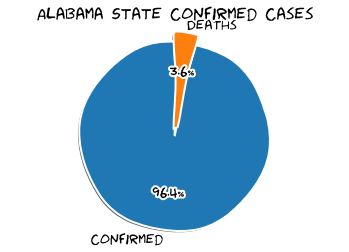

Alabama State Total Population
4887871
Alabama State Confirmed
17061 (0.3490476733121639% of population)
Alabama State Deaths
611 (3.581267217630854% of confirmed)



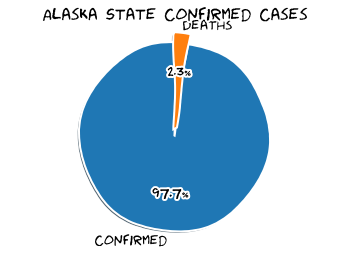

Alaska State Total Population
737438
Alaska State Confirmed
429 (0.05817438211754751% of population)
Alaska State Deaths
10 (2.331002331002331% of confirmed)



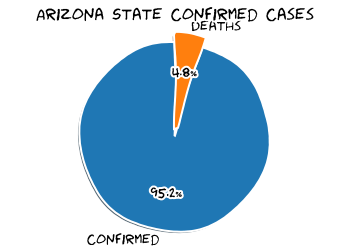

Arizona State Total Population
7171646
Arizona State Confirmed
18472 (0.25756988005264064% of population)
Arizona State Deaths
882 (4.774794283239498% of confirmed)



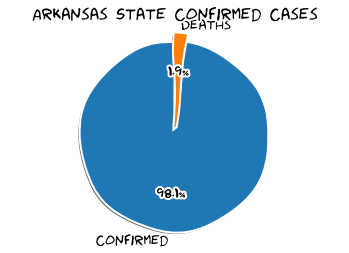

Arkansas State Total Population
3013825
Arkansas State Confirmed
6777 (0.22486375287218072% of population)
Arkansas State Deaths
132 (1.9477644975652944% of confirmed)



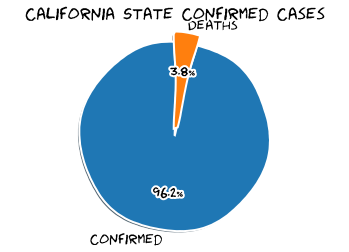

California State Total Population
39557045
California State Confirmed
106954 (0.27037914485270576% of population)
California State Deaths
4088 (3.8222039381416306% of confirmed)



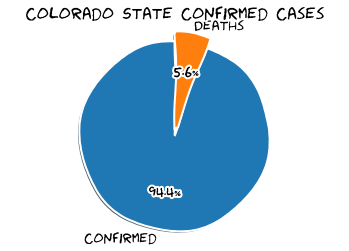

Colorado State Total Population
5695564
Colorado State Confirmed
25598 (0.44943749205522054% of population)
Colorado State Deaths
1436 (5.609813266661458% of confirmed)



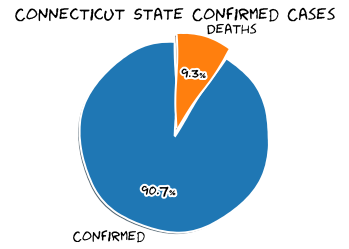

Connecticut State Total Population
3572665
Connecticut State Confirmed
41762 (1.1689313159784083% of population)
Connecticut State Deaths
3868 (9.262008524495952% of confirmed)



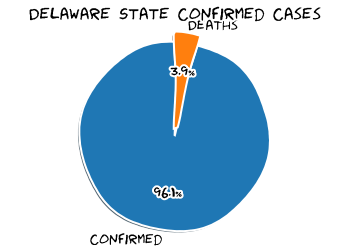

Delaware State Total Population
967171
Delaware State Confirmed
9236 (0.9549500553676651% of population)
Delaware State Deaths
356 (3.854482459939368% of confirmed)



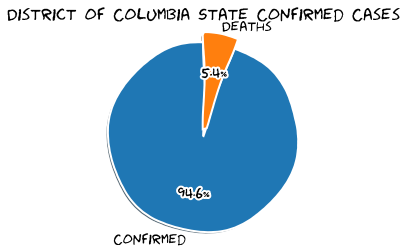

District of Columbia State Total Population
702455
District of Columbia State Confirmed
8538 (1.2154515235851406% of population)
District of Columbia State Deaths
460 (5.387678613258375% of confirmed)



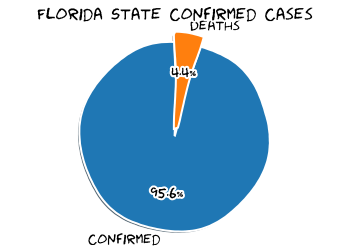

Florida State Total Population
21299325
Florida State Confirmed
54497 (0.25586256841472677% of population)
Florida State Deaths
2413 (4.427766666055012% of confirmed)



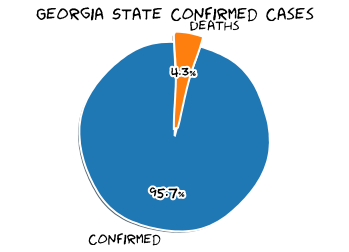

Georgia State Total Population
10519475
Georgia State Confirmed
46230 (0.4394706009567968% of population)
Georgia State Deaths
2002 (4.330521306510924% of confirmed)



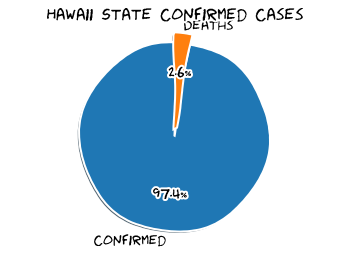

Hawaii State Total Population
1420491
Hawaii State Confirmed
649 (0.045688427452197866% of population)
Hawaii State Deaths
17 (2.6194144838212634% of confirmed)



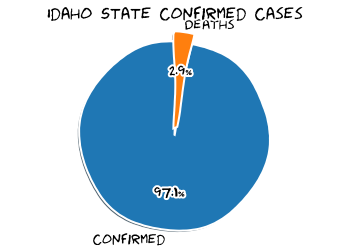

Idaho State Total Population
1754208
Idaho State Confirmed
2803 (0.15978720881446212% of population)
Idaho State Deaths
82 (2.9254370317516947% of confirmed)



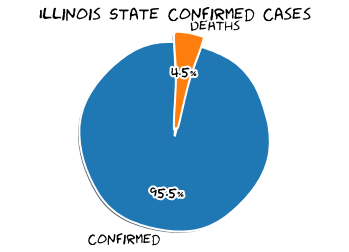

Illinois State Total Population
12741080
Illinois State Confirmed
117455 (0.9218606271995781% of population)
Illinois State Deaths
5270 (4.486824741390319% of confirmed)



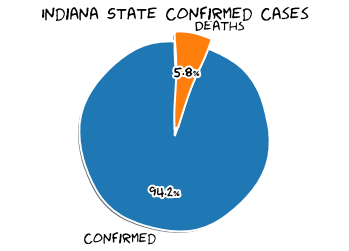

Indiana State Total Population
6691878
Indiana State Confirmed
33558 (0.5014735773724506% of population)
Indiana State Deaths
1946 (5.798915310805173% of confirmed)



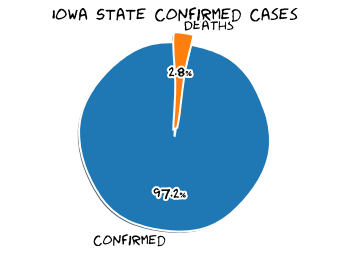

Iowa State Total Population
3156145
Iowa State Confirmed
18954 (0.6005427507291332% of population)
Iowa State Deaths
524 (2.764587949773135% of confirmed)



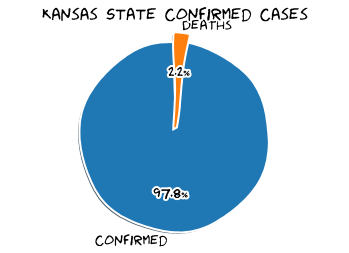

Kansas State Total Population
2911510
Kansas State Confirmed
9662 (0.3318552915840921% of population)
Kansas State Deaths
215 (2.2252121713930864% of confirmed)



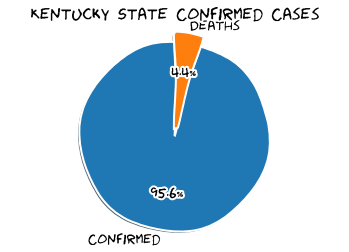

Kentucky State Total Population
4468402
Kentucky State Confirmed
9464 (0.21179831179021047% of population)
Kentucky State Deaths
418 (4.416737109044801% of confirmed)



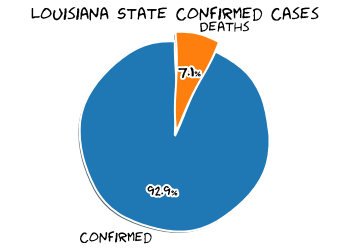

Louisiana State Total Population
4659978
Louisiana State Confirmed
38802 (0.8326648752419002% of population)
Louisiana State Deaths
2767 (7.131075717746508% of confirmed)



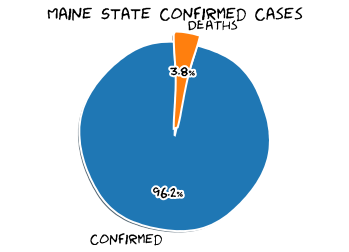

Maine State Total Population
1338404
Maine State Confirmed
2226 (0.16631749456815728% of population)
Maine State Deaths
85 (3.8185085354896673% of confirmed)



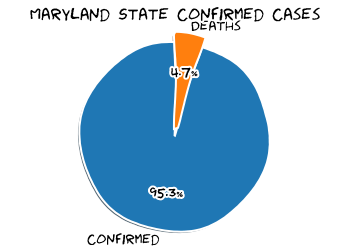

Maryland State Total Population
6042718
Maryland State Confirmed
52015 (0.8607881420248307% of population)
Maryland State Deaths
2454 (4.717869845236951% of confirmed)



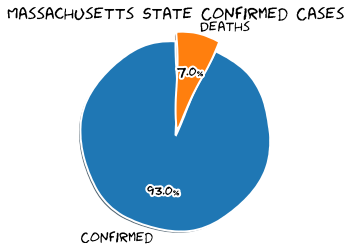

Massachusetts State Total Population
6902149
Massachusetts State Confirmed
95512 (1.383800900270336% of population)
Massachusetts State Deaths
6718 (7.033671161738838% of confirmed)



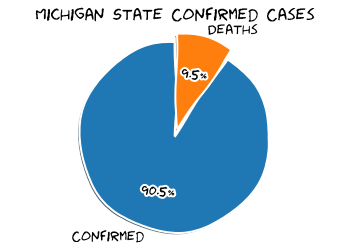

Michigan State Total Population
9995915
Michigan State Confirmed
56621 (0.5664413913083495% of population)
Michigan State Deaths
5406 (9.547694318362444% of confirmed)



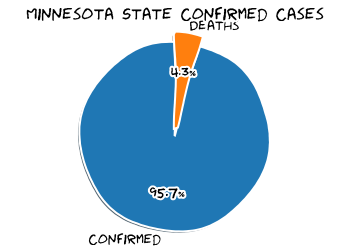

Minnesota State Total Population
5611179
Minnesota State Confirmed
23531 (0.4193592826035313% of population)
Minnesota State Deaths
1006 (4.275211423228932% of confirmed)



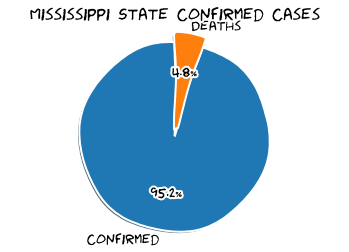

Mississippi State Total Population
2986530
Mississippi State Confirmed
14793 (0.4953240047814688% of population)
Mississippi State Deaths
710 (4.799567362941932% of confirmed)



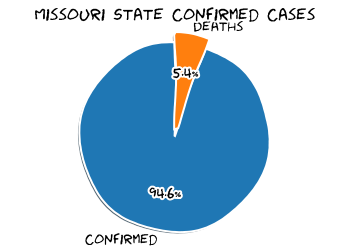

Missouri State Total Population
6126452
Missouri State Confirmed
13153 (0.21469196200345647% of population)
Missouri State Deaths
707 (5.375199574241618% of confirmed)



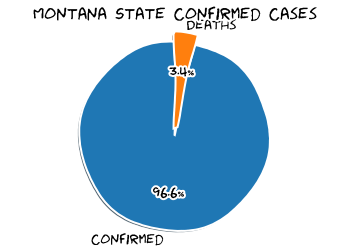

Montana State Total Population
1062305
Montana State Confirmed
493 (0.04640851732788606% of population)
Montana State Deaths
17 (3.4482758620689653% of confirmed)



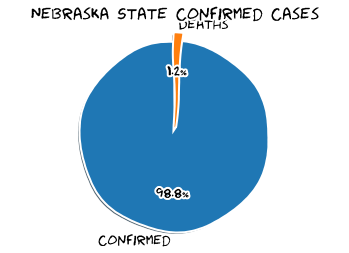

Nebraska State Total Population
1929268
Nebraska State Confirmed
13654 (0.7077295637516405% of population)
Nebraska State Deaths
170 (1.2450563937307748% of confirmed)



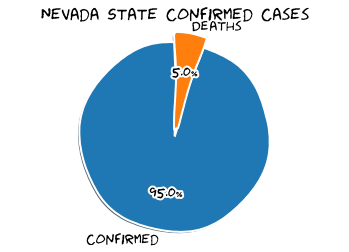

Nevada State Total Population
3034392
Nevada State Confirmed
8376 (0.2760355286989947% of population)
Nevada State Deaths
415 (4.954632282712512% of confirmed)



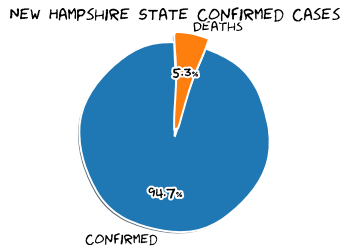

New Hampshire State Total Population
1356458
New Hampshire State Confirmed
4492 (0.3311565857549589% of population)
New Hampshire State Deaths
238 (5.2983081032947466% of confirmed)



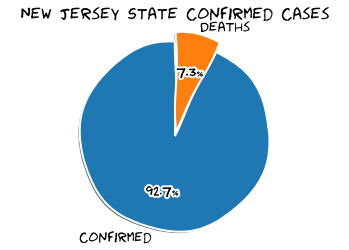

New Jersey State Total Population
8908520
New Jersey State Confirmed
158844 (1.783057118354115% of population)
New Jersey State Deaths
11531 (7.259323613104682% of confirmed)



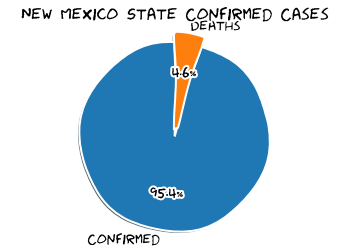

New Mexico State Total Population
2095428
New Mexico State Confirmed
7493 (0.35758804406546063% of population)
New Mexico State Deaths
344 (4.590951554784466% of confirmed)



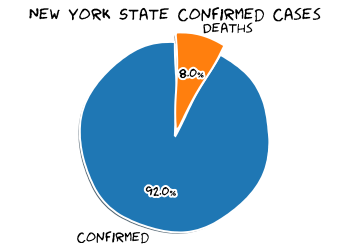

New York State Total Population
19542209
New York State Confirmed
368284 (1.8845566537539333% of population)
New York State Deaths
29646 (8.049765941501667% of confirmed)



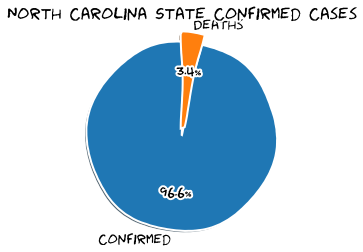

North Carolina State Total Population
10383620
North Carolina State Confirmed
26969 (0.2597263767356664% of population)
North Carolina State Deaths
919 (3.4076161518780825% of confirmed)



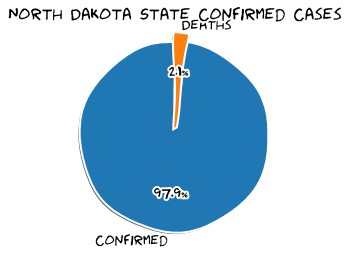

North Dakota State Total Population
760077
North Dakota State Confirmed
2520 (0.3315453565888719% of population)
North Dakota State Deaths
53 (2.1031746031746033% of confirmed)



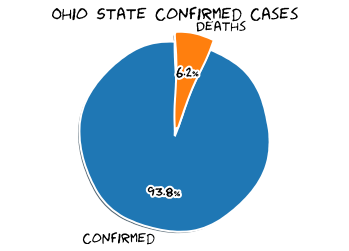

Ohio State Total Population
11689442
Ohio State Confirmed
34566 (0.2957027375643765% of population)
Ohio State Deaths
2131 (6.1650176473991785% of confirmed)



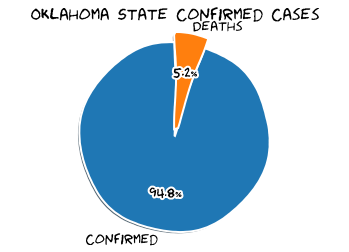

Oklahoma State Total Population
3943079
Oklahoma State Confirmed
6338 (0.16073733242473712% of population)
Oklahoma State Deaths
329 (5.19091195960871% of confirmed)



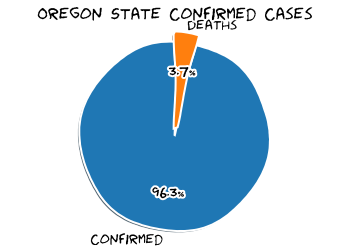

Oregon State Total Population
4190713
Oregon State Confirmed
4131 (0.09857511120422706% of population)
Oregon State Deaths
151 (3.655289276204309% of confirmed)



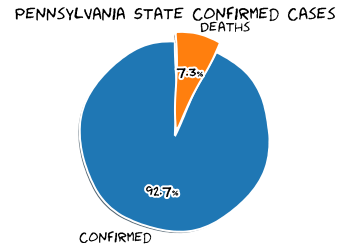

Pennsylvania State Total Population
12807060
Pennsylvania State Confirmed
74984 (0.5854895659113021% of population)
Pennsylvania State Deaths
5464 (7.2868878694121415% of confirmed)



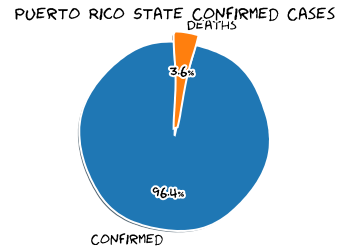

Puerto Rico State Total Population
3195153
Puerto Rico State Confirmed
3718 (0.11636375472473463% of population)
Puerto Rico State Deaths
133 (3.5771920387305% of confirmed)



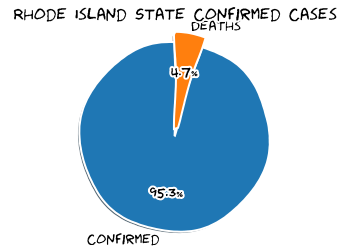

Rhode Island State Total Population
1057315
Rhode Island State Confirmed
14635 (1.3841664972122782% of population)
Rhode Island State Deaths
693 (4.735223778612914% of confirmed)



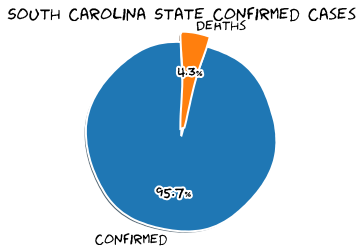

South Carolina State Total Population
5084127
South Carolina State Confirmed
11131 (0.21893630902611202% of population)
South Carolina State Deaths
483 (4.33923277333573% of confirmed)



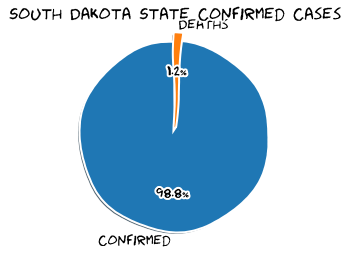

South Dakota State Total Population
882235
South Dakota State Confirmed
4866 (0.5515537243478211% of population)
South Dakota State Deaths
59 (1.2124948623099054% of confirmed)



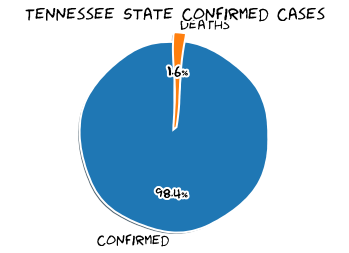

Tennessee State Total Population
6770010
Tennessee State Confirmed
22063 (0.32589316707065424% of population)
Tennessee State Deaths
361 (1.6362235416761093% of confirmed)



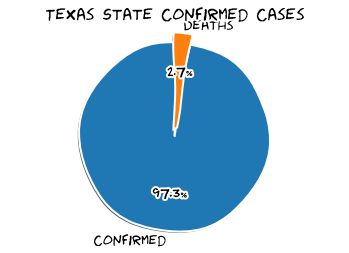

Texas State Total Population
28701845
Texas State Confirmed
61630 (0.21472487221640282% of population)
Texas State Deaths
1635 (2.65292876845692% of confirmed)



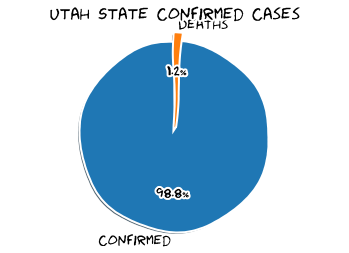

Utah State Total Population
3161105
Utah State Confirmed
9264 (0.2930620779758977% of population)
Utah State Deaths
107 (1.1550086355785838% of confirmed)



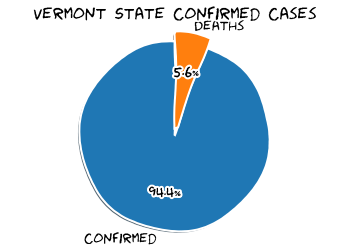

Vermont State Total Population
626299
Vermont State Confirmed
975 (0.15567644208277515% of population)
Vermont State Deaths
55 (5.641025641025641% of confirmed)



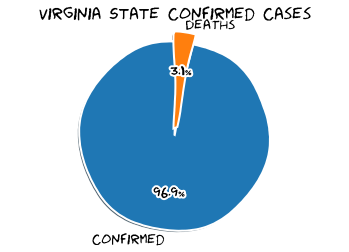

Virginia State Total Population
8517685
Virginia State Confirmed
43612 (0.5120170562776153% of population)
Virginia State Deaths
1370 (3.141337246629368% of confirmed)



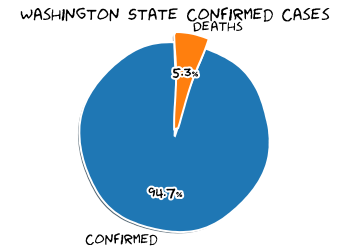

Washington State Total Population
7535591
Washington State Confirmed
21071 (0.27961974050874044% of population)
Washington State Deaths
1111 (5.272649613212472% of confirmed)



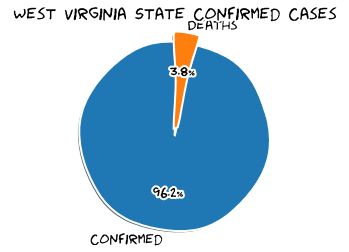

West Virginia State Total Population
1805832
West Virginia State Confirmed
1972 (0.10920174191176146% of population)
West Virginia State Deaths
74 (3.7525354969574036% of confirmed)



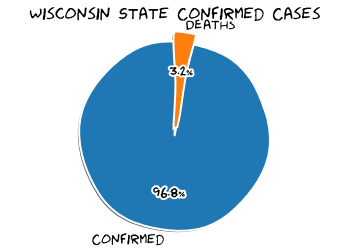

Wisconsin State Total Population
5813568
Wisconsin State Confirmed
17707 (0.30458059491176503% of population)
Wisconsin State Deaths
568 (3.2077709380470996% of confirmed)



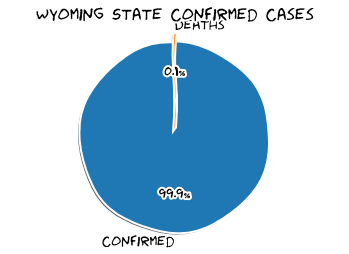

Wyoming State Total Population
577737
Wyoming State Confirmed
891 (0.15422242300562367% of population)
Wyoming State Deaths
1 (0.11223344556677892% of confirmed)



In [10]:
for i in states:
    state_details(i)

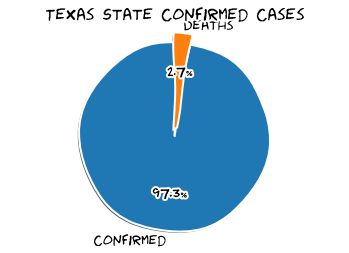

Texas State Total Population
28701845
Texas State Confirmed
61630 (0.21472487221640282% of population)
Texas State Deaths
1635 (2.65292876845692% of confirmed)



In [11]:
state_details('Texas')

In [12]:
# quick summary
print('US Confirmed')
print(us['confirmed'].sum())
print('US Deaths')
print(us['deaths'].sum())
print('')

ny = us.loc[us['provinceState'] == 'New York']
nyc = ny.loc[ny['admin2'] == 'New York City']
print('New York City Confirmed')
print(nyc['confirmed'].sum())
print('New York City Deaths')
print(nyc['deaths'].sum())
print('')

# create a dataframe of all comfirmed cases
global_confirmed = pd.DataFrame.from_dict(confirmed.json())

ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
print('Philippines Confirmed')
print(ph['confirmed'].sum())
print('Philippines Deaths')
print(ph['deaths'].sum())
print('')

US Confirmed
1749846
US Deaths
102657

New York City Confirmed
201999
New York City Deaths
21477

Philippines Confirmed
17224
Philippines Deaths
950



In [13]:
# show api endpoints
api.json()

{'confirmed': {'detail': 'https://covid19.mathdro.id/api/confirmed',
  'value': 5968693},
 'countries': 'https://covid19.mathdro.id/api/countries',
 'countryDetail': {'example': 'https://covid19.mathdro.id/api/countries/USA',
  'pattern': 'https://covid19.mathdro.id/api/countries/[country]'},
 'dailySummary': 'https://covid19.mathdro.id/api/daily',
 'dailyTimeSeries': {'example': 'https://covid19.mathdro.id/api/daily/2-14-2020',
  'pattern': 'https://covid19.mathdro.id/api/daily/[dateString]'},
 'deaths': {'detail': 'https://covid19.mathdro.id/api/deaths',
  'value': 365796},
 'image': 'https://covid19.mathdro.id/api/og',
 'lastUpdate': '2020-05-30T14:33:47.000Z',
 'recovered': {'detail': 'https://covid19.mathdro.id/api/recovered',
  'value': 2520587},
 'source': 'https://github.com/mathdroid/covid19'}

In [0]:
# get date
yesterday = today - timedelta(days=1)
date = yesterday.strftime('%m-%d-%Y').lstrip('0').replace(' 0', '')

In [15]:
# Get yesterday's data
r = request.get('https://covid19.mathdro.id/api/daily/{}'.format(date))
print(r)
j = r.json()
df = pd.DataFrame.from_dict(j)
df

<Response [200]>


,fips,admin2,provinceState,countryRegion,lastUpdate,lat,long,confirmed,deaths,recovered,active,combinedKey,incidenceRate,case-fatalityRatio
0,45001,Abbeville,South Carolina,US,2020-05-30 02:32:48,34.22333378,-82.46170658,39,0,0,39,"Abbeville, South Carolina, US",159.0084396787214,0.0
1,22001,Acadia,Louisiana,US,2020-05-30 02:32:48,30.2950649,-92.41419698,401,23,0,378,"Acadia, Louisiana, US",646.305101136272,5.7356608478802995
2,51001,Accomack,Virginia,US,2020-05-30 02:32:48,37.76707161,-75.63234615,827,12,0,815,"Accomack, Virginia, US",2559.1038494863224,1.4510278113663846
3,16001,Ada,Idaho,US,2020-05-30 02:32:48,43.4526575,-116.24155159999998,803,22,0,781,"Ada, Idaho, US",166.7403812810562,2.73972602739726
4,19001,Adair,Iowa,US,2020-05-30 02:32:48,41.33075609,-94.47105874,9,0,0,9,"Adair, Iowa, US",125.83892617449665,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3517,,,,West Bank and Gaza,2020-05-30 02:32:48,31.9522,35.2332,446,3,368,75,West Bank and Gaza,8.742670662420002,0.672645739910314
3518,,,,Western Sahara,2020-05-30 02:32:48,24.2155,-12.8858,9,1,6,2,Western Sahara,1.5067048365225253,11.11111111111111
3519,,,,Yemen,2020-05-30 02:32:48,15.552726999999999,48.516388,283,65,11,207,Yemen,0.948837603527235,22.968197879858657
3520,,,,Zambia,2020-05-30 02:32:48,-13.133897,27.849332,1057,7,779,271,Zambia,5.749578599948782,0.6622516556291391


In [16]:
# get all US confirmed cases
us = pd.DataFrame.from_dict(us_confirmed.json())
us

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1590849227000,40.767273,-73.971526,201999,0,21477,180522,New York City,36061,"New York City, New York, US",2422.975099,None,None,84036061,USA
1,Illinois,US,1590849227000,41.841448,-87.816588,76266,0,3570,72696,Cook,17031,"Cook, Illinois, US",1480.826207,None,None,84017031,USA
2,California,US,1590849227000,34.308284,-118.228241,51685,0,2294,49391,Los Angeles,06037,"Los Angeles, California, US",514.836628,None,None,84006037,USA
3,New York,US,1590849227000,40.740665,-73.589419,40226,0,2118,38108,Nassau,36059,"Nassau, New York, US",2964.499117,None,None,84036059,USA
4,New York,US,1590849227000,40.883201,-72.801217,39445,0,1879,37566,Suffolk,36103,"Suffolk, New York, US",2671.337755,None,None,84036103,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,Montana,US,1590849227000,46.466525,-109.846464,1,0,0,1,Wheatland,30107,"Wheatland, Montana, US",47.036689,None,None,84030107,USA
2969,Kansas,US,1590849227000,37.559372,-95.743233,1,0,0,1,Wilson,20205,"Wilson, Kansas, US",11.730205,None,None,84020205,USA
2970,Kentucky,US,1590849227000,37.739416,-83.493036,1,0,0,1,Wolfe,21237,"Wolfe, Kentucky, US",13.972335,None,None,84021237,USA
2971,Alaska,US,1590849227000,65.508155,-151.390739,1,0,0,1,Yukon-Koyukuk,02290,"Yukon-Koyukuk, Alaska, US",19.120459,None,None,84002290,USA


In [17]:
# return only New York state
ny = us.loc[us['provinceState'] == 'New York']
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1590849227000,40.767273,-73.971526,201999,0,21477,180522,New York City,36061,"New York City, New York, US",2422.975099,None,None,84036061,USA
3,New York,US,1590849227000,40.740665,-73.589419,40226,0,2118,38108,Nassau,36059,"Nassau, New York, US",2964.499117,None,None,84036059,USA
4,New York,US,1590849227000,40.883201,-72.801217,39445,0,1879,37566,Suffolk,36103,"Suffolk, New York, US",2671.337755,None,None,84036103,USA
5,New York,US,1590849227000,41.162784,-73.757417,33349,0,1359,31990,Westchester,36119,"Westchester, New York, US",3446.903688,None,None,84036119,USA
20,New York,US,1590849227000,41.150279,-74.025605,13100,0,631,12469,Rockland,36087,"Rockland, New York, US",4021.007462,None,None,84036087,USA
27,New York,US,1590849227000,41.403375,-74.302408,10361,0,444,9917,Orange,36071,"Orange, New York, US",2691.588299,None,None,84036071,USA
59,New York,US,1590849227000,42.762490,-78.730637,5935,0,516,5419,Erie,36029,"Erie, New York, US",646.020146,None,None,84036029,USA
83,New York,US,1590849227000,41.764861,-73.743567,3887,0,139,3748,Dutchess,36027,"Dutchess, New York, US",1321.129231,None,None,84036027,USA
104,New York,US,1590849227000,43.146389,-77.693229,2860,0,216,2644,Monroe,36055,"Monroe, New York, US",385.564258,None,None,84036055,USA
133,New York,US,1590849227000,43.004919,-76.199712,2092,0,131,1961,Onondaga,36067,"Onondaga, New York, US",454.261196,None,None,84036067,USA


In [18]:
ny_total_confirmed = ny['confirmed'].sum()
ny_total_confirmed

368284

In [19]:
# return only New York City
nyc = ny.loc[ny['admin2'] == 'New York City']
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1590849227000,40.767273,-73.971526,201999,0,21477,180522,New York City,36061,"New York City, New York, US",2422.975099,None,None,84036061,USA


In [20]:
# show all Philippines confirmed
# ph = pd.DataFrame.from_dict(ph_confirmed.json())
ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
ph


,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3,iso2
64,None,Philippines,1590849227000,12.879721,121.774017,17224,3808,950,12466,None,None,Philippines,15.718041,None,None,608,PHL,PH


In [21]:
pop
pop.loc[pop['State'] == 'Texas']

,ID State,State,ID Year,Year,Population,Slug State
43,04000US48,Texas,2018,2018,28701845,texas
